In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import Deconfuso

#%matplotlib notebook

zdi_data = Table.read("../zdi_data/MasterTable_ZDI.csv",format='csv')


In [2]:
mass = zdi_data['Mass(Msun)']
period = zdi_data['Prot(d)']
rossby = zdi_data['Ro (W18)']
B2 = zdi_data['<B2>(1e5 G2)']* 0.1 # in units of kG^2
Bfield = zdi_data['<B>(kG)']
poloidal = zdi_data['Pol.']
dipole = zdi_data['Dip.']
quad = zdi_data['Qua.']
octo = zdi_data['Oct.']
axisym = zdi_data['Axisym']

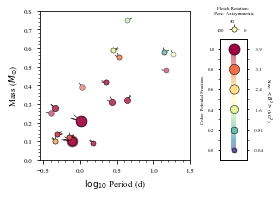

In [3]:
outputs01 = Deconfuso.Deconfusogram(np.log10(period),mass,poloidal,B2,axisym,file='../plots/Deconfuso_01.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.55,1.5],ylims=[0,0.8],addColorStrip=True)

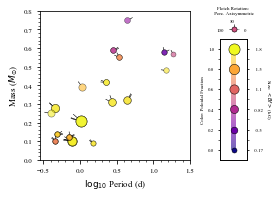

In [4]:
outputs2 = Deconfuso.Deconfusogram(np.log10(period),mass,poloidal,Bfield,axisym,file='../plots/Deconfuso_02.pdf',arealabel="Size: $<Bf>$ (kG)",
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.55,1.5],ylims=[0,0.8],addColorStrip=True,cmap='plasma')

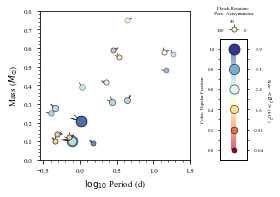

In [5]:
outputs3 = Deconfuso.Deconfusogram(np.log10(period),mass,dipole,B2,axisym,file='../plots/Deconfuso_03.pdf',collabel="Color: Dipolar Fraction",
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.55,1.5],ylims=[0,0.8],addColorStrip=True,cmap='RdYlBu')

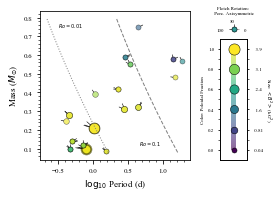

In [7]:



## RNAAS plot:

def convTime(mass):
        coef = [0.31,-1.50,2.33]
        return np.power(10,np.poly1d(coef)(mass)) # output in days

masses = np.linspace(0.08,0.8,1000)
tauC = convTime(masses)
per01 = np.log10(0.01 * tauC)
per1 = np.log10(0.1 * tauC)


#mpl.rcParams['text.usetex'] = True
fig, ax,colA,rotA = Deconfuso.Deconfusogram(np.log10(period),mass, poloidal,B2 ,axisym,
                                            xlabel="$\log_{10}$ Period (d)",addColorStrip=True,cmap='viridis')

ax.plot(per01,masses,':',linewidth=1,color='gray')
ax.plot(per1,masses,'--',linewidth=1,color='gray')
ax.text(-0.5,0.75,"$Ro = 0.01$",fontsize=5)
ax.text(0.65,0.12,"$Ro = 0.1$",fontsize=5)
fig.savefig("../plots/Deconfuso_RNAAS.pdf")

#mpl.rcParams['text.usetex'] = False
